# Oscar De la Cruz Echevetse

# El péndulo forzado amortiguado

## Instrucciones:

La ecuación del péndulo forzado amortiguado es

    Aceleración+Amortiguamiento+Gravedad=Fuerza externa

Que como ecuación se ve:

\begin{equation}
\ddot \theta + \mu \dot\theta + sin(\theta) = Acos(\omega_d t)
\end{equation}

donde hemos normalizado el tiempo para que la frencuencia natural sea 1.

Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular tiene una función coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomandoc $A=1$ y $\mu=0.05$

## CODIGO

In [3]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import random
import scipy
import scipy.special
import math
from scipy.optimize import minimize
import scipy.stats as stats
import time

### Problemas a resolver:

a) Graficar la Amplitud como función de la frecuencia de la fuerza externa.

La solución particular vist en clase es:

\begin{equation}
x_p(t)=\frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + 4\omega_d^2\beta^2}} \cos(\omega_dt+\delta)
\end{equation}

Donde, en este caso: $\mu=2\beta$, $\omega_0=1$ y $A=1$.
Entonces, la amplitud será:

\begin{equation}
Amplitud=\frac{1}{\sqrt{(1-\omega_d^2)^2 + \omega_d^2\mu^2}}
\end{equation}

La cual defino como función en la siguiente linea de codigo:

In [4]:
#definimos función para la amplitud
def amplitud (dat):
    omg=dat[0]
    mu=dat[1]
    omg0=dat[2]
    arg=pow(pow(omg0,2)-pow(omg,2),2)+pow(omg*mu,2)
    return np.divide(1,arg)

In [35]:
ffe=np.linspace(0, 3, 10000) #ffe= frecuencia de la fuerza externa.
dats=np.array([ffe,0.05,1]) #mu=005
amp=amplitud(dats)

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

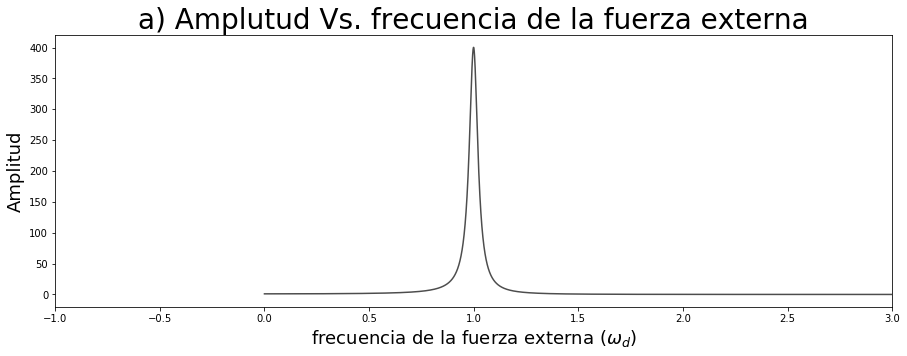

In [39]:
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('a) Amplutud Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Amplitud",fontsize=18)
plt.xlim(-1,np.amax(ffe))
#plt.ylim(0,10)
plt.plot(ffe,amp, color='0.3')
plt.show

b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

In [24]:
def fase (dat):
    omg=dat[0]
    mu=dat[1]
    omg0=dat[2]
    arg=np.divide(mu*omg,pow(omg0,2)-pow(omg,2))
    return -np.arctan(arg)

In [27]:
ffe=np.linspace(-1, 1, 10000) #ffe= frecuencia de la fuerza externa.
dats2=np.array([ffe,0.05,1]) #mu=005
fse=fase(dats2)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

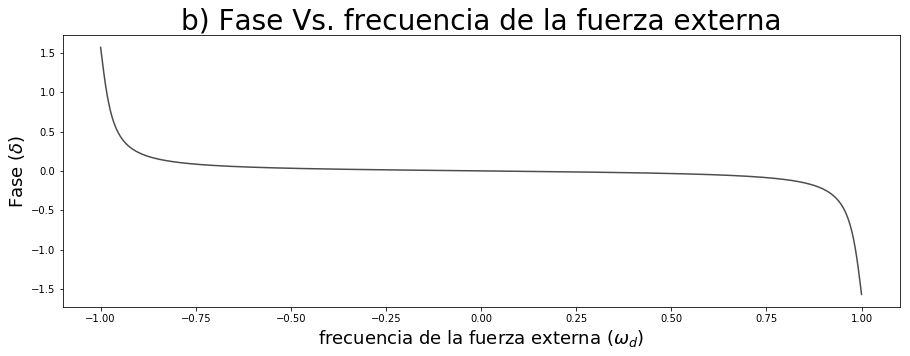

In [33]:
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('b) Fase Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Fase $(\delta)$",fontsize=18)
#plt.xlim(-1,1)
plt.plot(ffe,fse, color='0.3')
plt.show

c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.

d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

e) Graficar en el espacio fase 2 trayectorias con 2 A's distintas, $\mu=0.05$ y la misma confición inicial.

f) Graficar en el espacio fase 2 trayectorias con $2\mu's$ distintas, $A=1$ y la misma confición inicial.